In [1]:
import cv2
import matplotlib.pyplot as plt
import mxnet as mx
import numpy as np
import pandas as pd
import pickle
import seaborn as sn
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
legend_names = {'a': 'Wraith', 'b': 'Bangalore', 'c': 'Caustic', 'g': 'Gibraltar', 'i': 'Lifeline',
               'l': 'Bloodhound', 'm': 'Mirage', 'o': 'Octane', 'p': 'Pathfinder', 'r': 'Crypto', 'w': 'Wattson'}

def load_data(file_path):
    data = []
    with open(file_path, 'rb') as fin:
        while True:
            try:
                data.append((pickle.load(fin), pickle.load(fin)))
            except:
                break
    return data

def process_data(data):
    np.random.shuffle(data)
    images = np.stack([image for image, _ in data])
    images = np.moveaxis(images, -1, 1)
    labels = [label for _, label in data]
    return images, labels

def plot_confusion_matrix(label_names, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index = label_names, columns = label_names)
    plt.figure(figsize = (5, 5))
    plt.title('Validation Confusion Matrix')
    sn.heatmap(df_cm, annot=True)
    plt.show()

In [3]:
data = load_data(r'C:\Users\cidzerda\Documents\GitHub\streams\3200.pickle')
images, labels = process_data(data)
data.clear()
label_names = sorted(Counter(labels))
label_dict = {b: a for a, b in enumerate(label_names)}
labels = [label_dict[label] for label in labels]

In [4]:
eighty_percent = round(0.8 * len(images))
ninety_percent = round(0.9 * len(images))
training_indices = np.arange(0, eighty_percent)
validation_indices = np.arange(eighty_percent, ninety_percent)
testing_indices = np.arange(ninety_percent, len(images))
training_images, training_labels = images[training_indices], [labels[i] for i in training_indices]
validation_images, validation_labels = images[validation_indices], [labels[i] for i in validation_indices]
testing_images, testing_labels = images[testing_indices], [labels[i] for i in testing_indices]

In [5]:
ctx = mx.gpu()

# Define the hyper-parameters of the learning system.
batch_size = 1500
epochs = 30
learning_rate = 0.01

# Create the network.
num_outputs = len(label_names)
net = mx.gluon.nn.Sequential()
with net.name_scope():
    net.add(mx.gluon.nn.Flatten())
    net.add(mx.gluon.nn.Dense(2048, activation="relu"))
    net.add(mx.gluon.nn.Dense(2048, activation="relu"))
    net.add(mx.gluon.nn.Dense(num_outputs))

# Initialize the network's parameters.
net.collect_params().initialize(mx.init.Xavier(magnitude=2.24), ctx=ctx)

# Define the loss and the trainer.
softmax_cross_etropy_loss = mx.gluon.loss.SoftmaxCrossEntropyLoss()
trainer = mx.gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': learning_rate})

Epoch 0, training loss: 1.58, validation loss: 1.13, training accuracy: 0.48, validation accuracy: 0.68


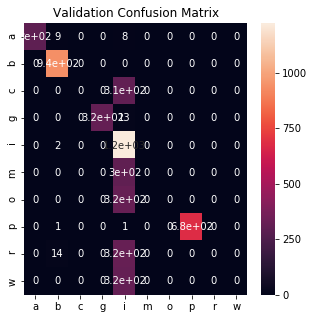

Epoch 1, training loss: 0.91, validation loss: 0.69, training accuracy: 0.87, validation accuracy: 1.00


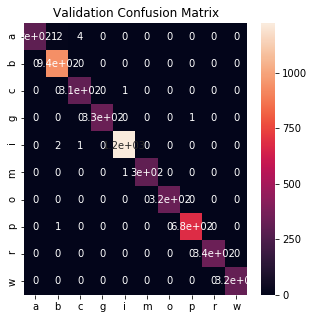

Epoch 2, training loss: 0.56, validation loss: 0.45, training accuracy: 1.00, validation accuracy: 1.00


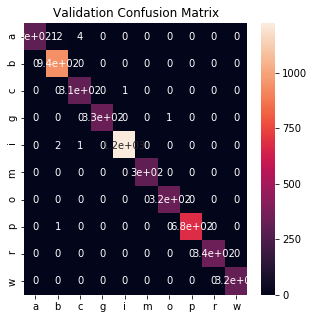

Epoch 3, training loss: 0.37, validation loss: 0.30, training accuracy: 1.00, validation accuracy: 1.00


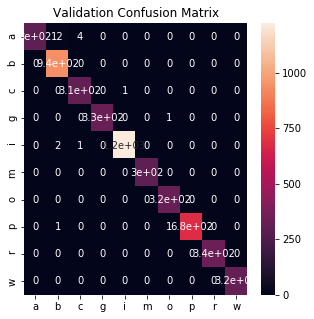

Epoch 4, training loss: 0.26, validation loss: 0.22, training accuracy: 1.00, validation accuracy: 1.00


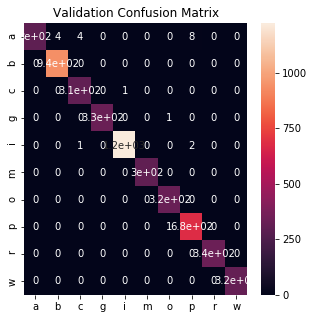

Epoch 5, training loss: 0.19, validation loss: 0.16, training accuracy: 1.00, validation accuracy: 1.00


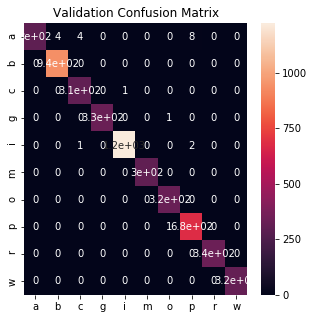

Epoch 6, training loss: 0.15, validation loss: 0.13, training accuracy: 1.00, validation accuracy: 1.00


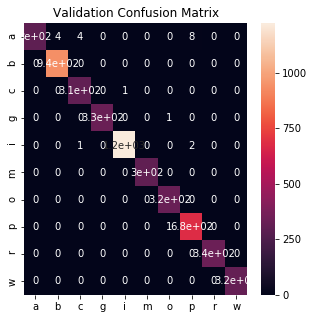

Epoch 7, training loss: 0.12, validation loss: 0.11, training accuracy: 1.00, validation accuracy: 1.00


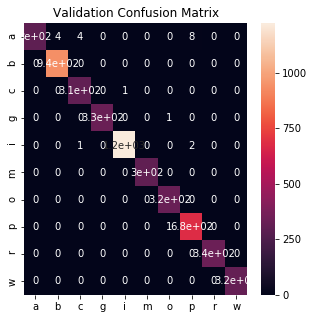

Epoch 8, training loss: 0.10, validation loss: 0.09, training accuracy: 1.00, validation accuracy: 1.00


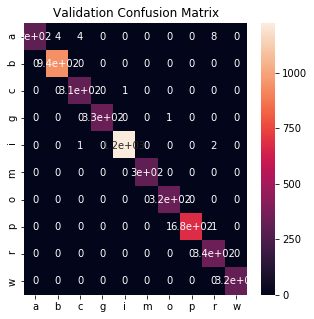

Epoch 9, training loss: 0.08, validation loss: 0.08, training accuracy: 1.00, validation accuracy: 1.00


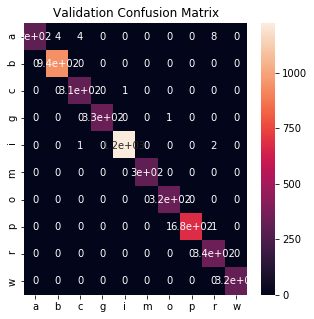

Epoch 10, training loss: 0.07, validation loss: 0.07, training accuracy: 1.00, validation accuracy: 1.00


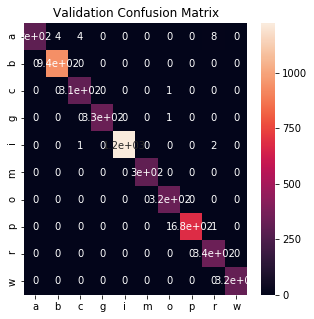

Epoch 11, training loss: 0.06, validation loss: 0.06, training accuracy: 1.00, validation accuracy: 1.00


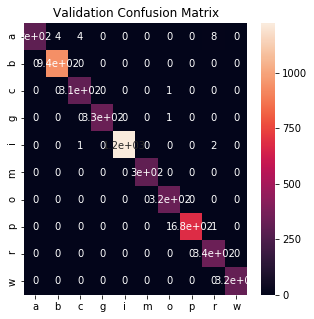

Epoch 12, training loss: 0.05, validation loss: 0.05, training accuracy: 1.00, validation accuracy: 1.00


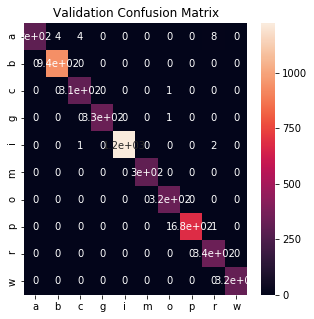

Epoch 13, training loss: 0.05, validation loss: 0.05, training accuracy: 1.00, validation accuracy: 1.00


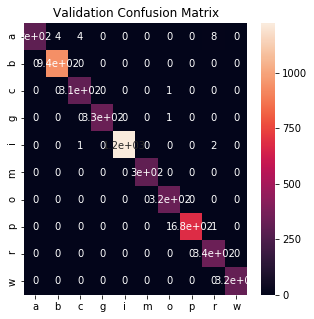

Epoch 14, training loss: 0.05, validation loss: 0.04, training accuracy: 1.00, validation accuracy: 1.00


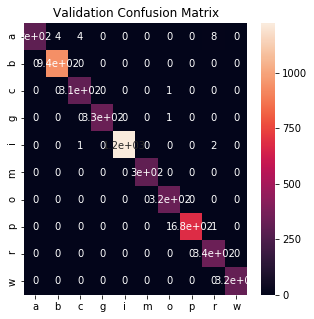

Epoch 15, training loss: 0.04, validation loss: 0.04, training accuracy: 1.00, validation accuracy: 1.00


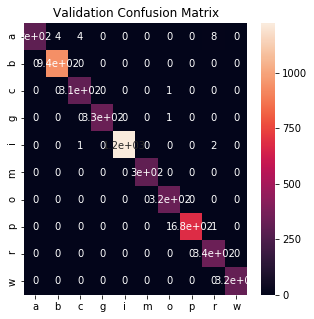

Epoch 16, training loss: 0.04, validation loss: 0.04, training accuracy: 1.00, validation accuracy: 1.00


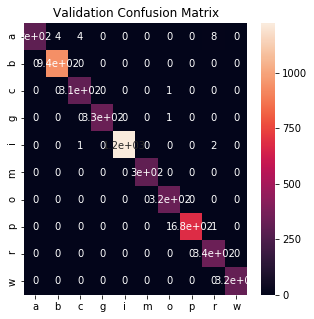

Epoch 17, training loss: 0.04, validation loss: 0.04, training accuracy: 1.00, validation accuracy: 1.00


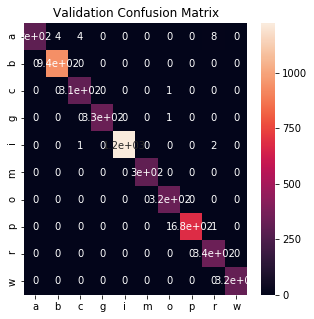

Epoch 18, training loss: 0.03, validation loss: 0.03, training accuracy: 1.00, validation accuracy: 1.00


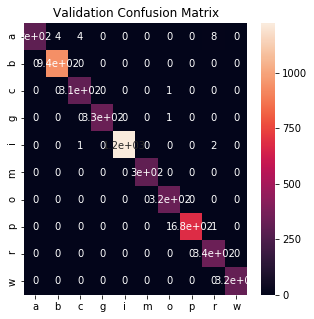

Epoch 19, training loss: 0.03, validation loss: 0.03, training accuracy: 1.00, validation accuracy: 1.00


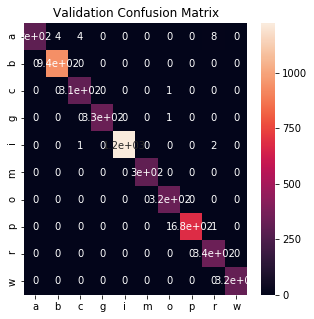

Epoch 20, training loss: 0.03, validation loss: 0.03, training accuracy: 1.00, validation accuracy: 1.00


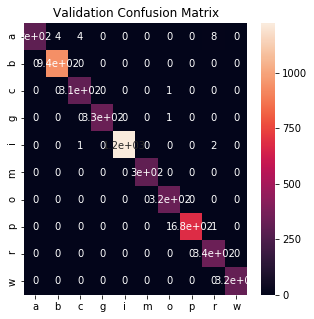

Epoch 21, training loss: 0.03, validation loss: 0.03, training accuracy: 1.00, validation accuracy: 1.00


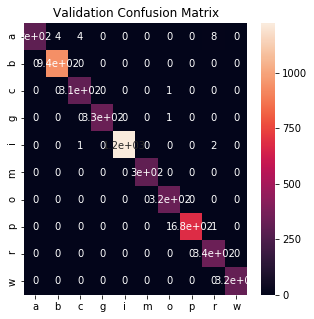

Epoch 22, training loss: 0.03, validation loss: 0.03, training accuracy: 1.00, validation accuracy: 1.00


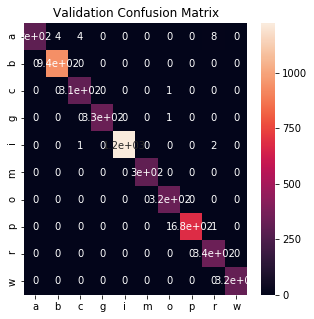

Epoch 23, training loss: 0.03, validation loss: 0.03, training accuracy: 1.00, validation accuracy: 1.00


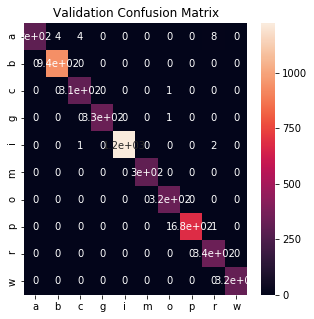

Epoch 24, training loss: 0.03, validation loss: 0.03, training accuracy: 1.00, validation accuracy: 1.00


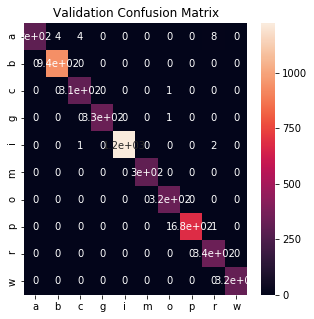

Epoch 25, training loss: 0.03, validation loss: 0.03, training accuracy: 1.00, validation accuracy: 1.00


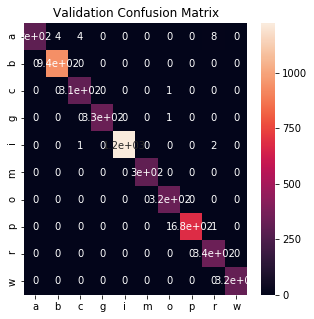

Epoch 26, training loss: 0.02, validation loss: 0.03, training accuracy: 1.00, validation accuracy: 1.00


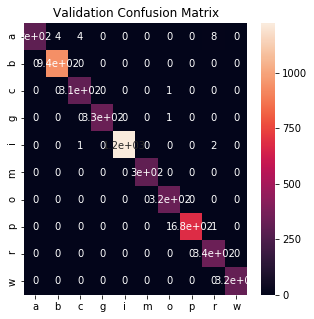

Epoch 27, training loss: 0.02, validation loss: 0.02, training accuracy: 1.00, validation accuracy: 1.00


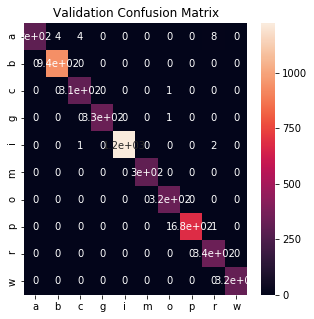

Epoch 28, training loss: 0.02, validation loss: 0.02, training accuracy: 1.00, validation accuracy: 1.00


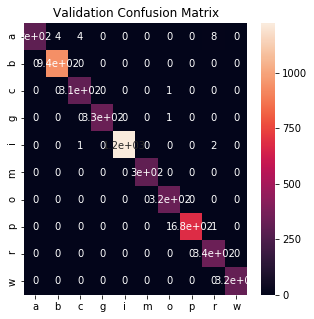

Epoch 29, training loss: 0.02, validation loss: 0.02, training accuracy: 1.00, validation accuracy: 1.00


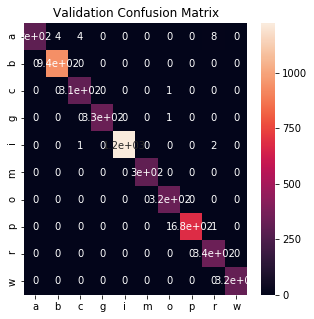

In [6]:
# Run epochs of training and validation.
for epoch in range(epochs):
    # Run the network on the training data set and determine the training Softmax cross-entopy loss.
    cumulative_training_loss = 0
    training_predictions = []
    for i in range(0, training_images.shape[0], batch_size):
        data = mx.ndarray.array(training_images[i:i + batch_size].astype('float32')).as_in_context(ctx)
        label = mx.ndarray.array(training_labels[i:i + batch_size]).as_in_context(ctx)
        with mx.autograd.record():
            output = net(data)
            training_predictions = training_predictions + np.argmax(output.asnumpy(), axis=1).tolist()
            loss = softmax_cross_etropy_loss(output, label)
            cumulative_training_loss = cumulative_training_loss + mx.ndarray.sum(loss)
        loss.backward()
        trainer.step(data.shape[0])
    training_loss = cumulative_training_loss / len(training_images)

    # Run the network on the validation data set and determine the validation Softmax cross-entopy loss.
    cumulative_validation_loss = 0
    validation_predictions = []
    for i in range(0, validation_images.shape[0], batch_size):
        data = mx.ndarray.array(validation_images[i:i + batch_size].astype('float32')).as_in_context(ctx)
        label = mx.ndarray.array(validation_labels[i:i + batch_size]).as_in_context(ctx)
        output = net(data)
        validation_predictions = validation_predictions + np.argmax(output.asnumpy(), axis=1).tolist()
        validation_loss = softmax_cross_etropy_loss(output, label)
        cumulative_validation_loss = cumulative_validation_loss + mx.ndarray.sum(validation_loss)
    validation_loss = cumulative_validation_loss / len(validation_images)

    # Calculate training and validation accuracies.
    # accuracy = (TP+TN) / (TP+FP+TN+FN)
    training_accuracy = accuracy_score(training_labels, training_predictions)
    validation_accuracy = accuracy_score(validation_labels, validation_predictions)

    # Print the summary and plot the confusion matrix after each epoch.
    print("Epoch {}, training loss: {:.2f}, validation loss: {:.2f}, training accuracy: {:.2f}, validation accuracy: {:.2f}".format(epoch, training_loss.asnumpy()[0], validation_loss.asnumpy()[0], training_accuracy, validation_accuracy))
    plot_confusion_matrix(label_names, validation_labels, validation_predictions)

predicted 5053 correct of 5082 (99.4%)


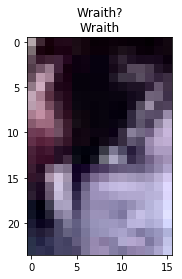

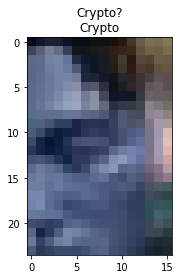

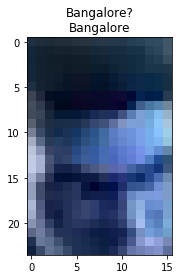

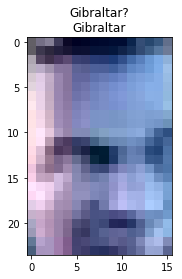

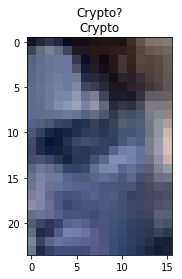

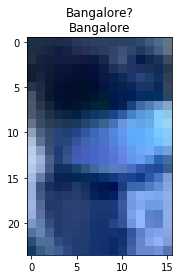

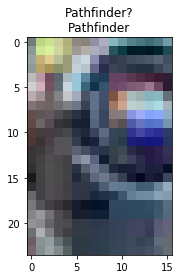

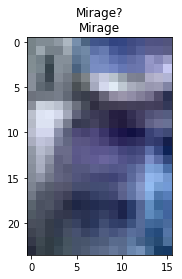

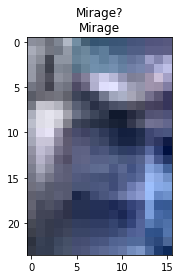

In [37]:
testing_predictions = []
for i in range(0, testing_images.shape[0], batch_size):
    data = mx.ndarray.array(testing_images[i:i + batch_size].astype('float32')).as_in_context(ctx)
    output = net(data)
    testing_predictions += np.argmax(output.asnumpy(), axis=1).tolist()
l = [a == b for a, b in zip(testing_labels, testing_predictions)]
print('predicted', sum(l), 'correct of', len(l), '({:.1%})'.format(sum(l) / len(l)))
for i in range(9):
    plt.imshow(np.moveaxis(testing_images[i], 0, -1))
    plt.title('{}?\n{}'.format(legend_names[label_names[testing_predictions[i]]], legend_names[label_names[testing_labels[i]]]))
    plt.show()

(3, 24, 16)


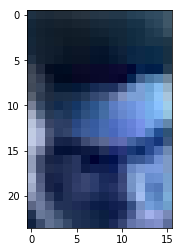

In [44]:
image = testing_images[2].copy()
print(image.shape)
plt.imshow(np.moveaxis(image, 0, -1))
plt.show()